<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Clusterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram,linkage # Para elaborar dendogramas de clustering jerárquico
from scipy.cluster.hierarchy import cophenet # Para conocer el coeficiente cofenético 
from scipy.spatial.distance import pdist
from mpl_toolkits.mplot3d import Axes3D 
from scipy.cluster.vq import vq # Para conocer las distancias hacias los baricentro según k means
from scipy.cluster.vq import kmeans # Para conocer las distancias hacias los baricentro según k means
from sklearn.cluster import AgglomerativeClustering # Para hacer un clustering jerárquicoX
from sklearn.cluster import KMeans # Para hacer clustering K-means
from sklearn import datasets

# **Distancias**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/CURSO UDEMY/Repositorio de Curso UDEMY/movies/movies.csv', sep = ';')

In [ ]:
data.head()
data.columns

Index(['user_id', 'star_wars', 'lord_of_the_rings', 'harry_potter'], dtype='object')

In [ ]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [ ]:
dd1 = distance_matrix(data[movies],data[movies], p = 1) # Mincowsky
dd2 = distance_matrix(data[movies],data[movies], p = 2) # Manhattan
dd10 = distance_matrix(data[movies],data[movies], p = 10)

In [ ]:
# Pasando los arrays a dataframe
def matriz_a_dataFrame(dd,col_name):
  import pandas as pd
  dd = pd.DataFrame(dd, index = col_name, columns = col_name)
  return dd

In [ ]:
matriz_a_dataFrame(dd2, data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [ ]:
matriz_a_dataFrame(dd2, data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [ ]:
matriz_a_dataFrame(dd10, data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


Text(0.5, 0, 'lord_of_the_rings')

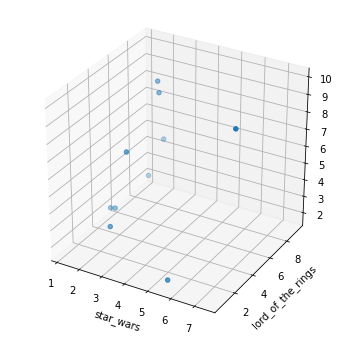

In [ ]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = data['star_wars'], ys = data['lord_of_the_rings'], zs = data['harry_potter'])
plt.xlabel('star_wars')
plt.ylabel('lord_of_the_rings')


# **Métodos de enlace**

**Clustering Jerárquico** 

Método aglomerativo donde cada punto empieza siendo un únicco cluster y en cada paso los vamos juntando hasta tener un único cluster basado en las similitudes de las observaciones.


1.   Enlace Simple: Mìnima distancia euclidiana entre cualquier punto de un cluster y el otro
2.   Enlace Completo: Màxima distancia euclidiana entre cualquier punto de un cluster y el otro
3.   Enlace Promedio: Promedio de distancias entre todos los puntos ubicdos en un cluster.
4.   Enlace del Centroide: Distancia entre el centroide del cluster 1 y el cluster 2.
4.   Enlace de ward: Minimiza el incremento del error combinado en la suma de cuadrados de las varianzas se une a un cluster ya existente para formar uno nuevo. Garantiza que los nuevos elementos que se unen a un cluster sean más similares a otros puntos que ya estaban antes.








**Clusterizando manualmente**

In [ ]:
df = matriz_a_dataFrame(dd1, data['user_id'])
df

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [ ]:
Z = []

In [ ]:
df[11] = df[1] + df[10]
df.loc[11] = df.loc[1] + df.loc[10]
Z.append([1,10,0.7,2])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [ ]:
# Reemplazando los valores de la columna 11
for i in df.columns.values.tolist():
  df.loc[11][i] = min(df.loc[1][i],df.loc[10][i])
  df.loc[i][11] = min(df.loc[i][1],df.loc[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [ ]:
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [ ]:
x = 2
y = 7

n = 12

df[n] = df[x] + df[y]
df.loc[n] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
  df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y],axis = 1)
df

user_id,1,3,4,5,6,8,9,10,11,12
user_id,,,,,,,,,,
1,0.0,15.9,9.1,4.2,6.9,7.4,5.6,0.7,0.0,9.9
3,15.9,0.0,12.4,18.5,9.0,17.3,12.9,15.2,15.2,12.0
4,9.1,12.4,0.0,12.7,11.0,15.3,5.5,8.8,8.8,17.2
5,4.2,18.5,12.7,0.0,9.5,3.2,8.2,3.9,3.9,6.1
6,6.9,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2,6.2
8,7.4,17.3,15.3,3.2,8.3,0.0,9.8,7.1,7.1,4.9
9,5.6,12.9,5.5,8.2,5.5,9.8,0.0,4.9,4.9,11.7
10,0.7,15.2,8.8,3.9,6.2,7.1,4.9,0.0,0.0,9.6
11,0.0,15.2,8.8,3.9,6.2,7.1,4.9,0.0,0.0,9.6


In [ ]:
x = 5
y = 8

n = 13

df[n] = df[x] + df[y]
df.loc[n] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
  df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y],axis = 1)
df

user_id,1,3,4,6,9,10,11,12,13
user_id,,,,,,,,,
1,0.0,15.9,9.1,6.9,5.6,0.7,0.0,9.9,4.2
3,15.9,0.0,12.4,9.0,12.9,15.2,15.2,12.0,17.3
4,9.1,12.4,0.0,11.0,5.5,8.8,8.8,17.2,12.7
6,6.9,9.0,11.0,0.0,5.5,6.2,6.2,6.2,8.3
9,5.6,12.9,5.5,5.5,0.0,4.9,4.9,11.7,8.2
10,0.7,15.2,8.8,6.2,4.9,0.0,0.0,9.6,3.9
11,0.0,15.2,8.8,6.2,4.9,0.0,0.0,9.6,3.9
12,9.9,12.0,17.2,6.2,11.7,9.6,9.6,0.0,4.9
13,4.2,17.3,12.7,8.3,8.2,3.9,3.9,4.9,0.0


In [ ]:
x = 11
y = 13

n = 14

df[n] = df[x] + df[y]
df.loc[n] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
  df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y],axis = 1)
df

user_id,1,3,4,6,9,10,12,14
user_id,,,,,,,,
1,0.0,15.9,9.1,6.9,5.6,0.7,9.9,0.0
3,15.9,0.0,12.4,9.0,12.9,15.2,12.0,15.2
4,9.1,12.4,0.0,11.0,5.5,8.8,17.2,8.8
6,6.9,9.0,11.0,0.0,5.5,6.2,6.2,6.2
9,5.6,12.9,5.5,5.5,0.0,4.9,11.7,4.9
10,0.7,15.2,8.8,6.2,4.9,0.0,9.6,0.0
12,9.9,12.0,17.2,6.2,11.7,9.6,0.0,4.9
14,0.0,15.2,8.8,6.2,4.9,0.0,4.9,0.0


In [ ]:
x = 9
y = 12
z = 14

n = 15
df[n] = df[x] + df[y] + df[z]
df.loc[n] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],3])

for i in df.columns.values.tolist():
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i],df.loc[z][i])
  df.loc[i][n] = min(df.loc[i][x],df.loc[i][y],df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z],axis = 1)
df

user_id,1,3,4,6,10,15
user_id,,,,,,
1,0.0,15.9,9.1,6.9,0.7,0.0
3,15.9,0.0,12.4,9.0,15.2,12.0
4,9.1,12.4,0.0,11.0,8.8,5.5
6,6.9,9.0,11.0,0.0,6.2,5.5
10,0.7,15.2,8.8,6.2,0.0,0.0
15,0.0,12.0,5.5,5.5,0.0,0.0


In [ ]:
x = 4
y = 6
z = 15

n = 16
df[n] = df[x] + df[y] + df[z]
df.loc[n] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],3])

for i in df.columns.values.tolist():
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i],df.loc[z][i])
  df.loc[i][n] = min(df.loc[i][x],df.loc[i][y],df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z],axis = 1)
df

user_id,1,3,10,16
user_id,,,,
1,0.0,15.9,0.7,0.0
3,15.9,0.0,15.2,9.0
10,0.7,15.2,0.0,0.0
16,0.0,9.0,0.0,0.0


In [ ]:
x = 3
y = 16

n = 17

df[n] = df[x] + df[y]
df.loc[n] = df.loc[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2])

for i in df.columns.values.tolist():
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
  df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y],axis = 1)
df

user_id,1,10,17
user_id,,,
1,0.0,0.7,0.0
10,0.7,0.0,0.0
17,0.0,0.0,0.0


In [ ]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 12, 11.7, 3],
 [4, 6, 11.0, 3],
 [3, 16, 9.0, 2]]

# **Clustering jerárquico y dendogramas**

(150, 2)


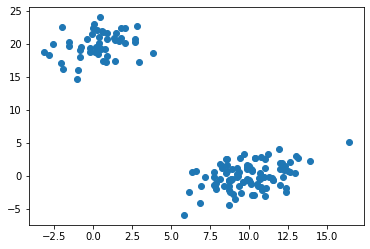

In [ ]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = (100,))
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
Z = linkage(X, method = 'ward', metric = 'euclidean')

In [ ]:
# Cophenet: Determinar el coeficiente de correlación cofenético
# Dicho coeficiente compara las distancias dos a dos con respecto
# a las distancias originales. Mientras más cercano a 1 mejor es
# el clustering.
# Parámetros: Matriz de distancias calculadas, distancias originales.

c, coph_dist = cophenet(Z, pdist(X))
print(str(c*100)+' por ciento de conservación de las distancias originales con respecto a los clusters que se han generado.')

98.00148387574268 por ciento de conservación de las distancias originales con respecto a los clusters que se han generado.


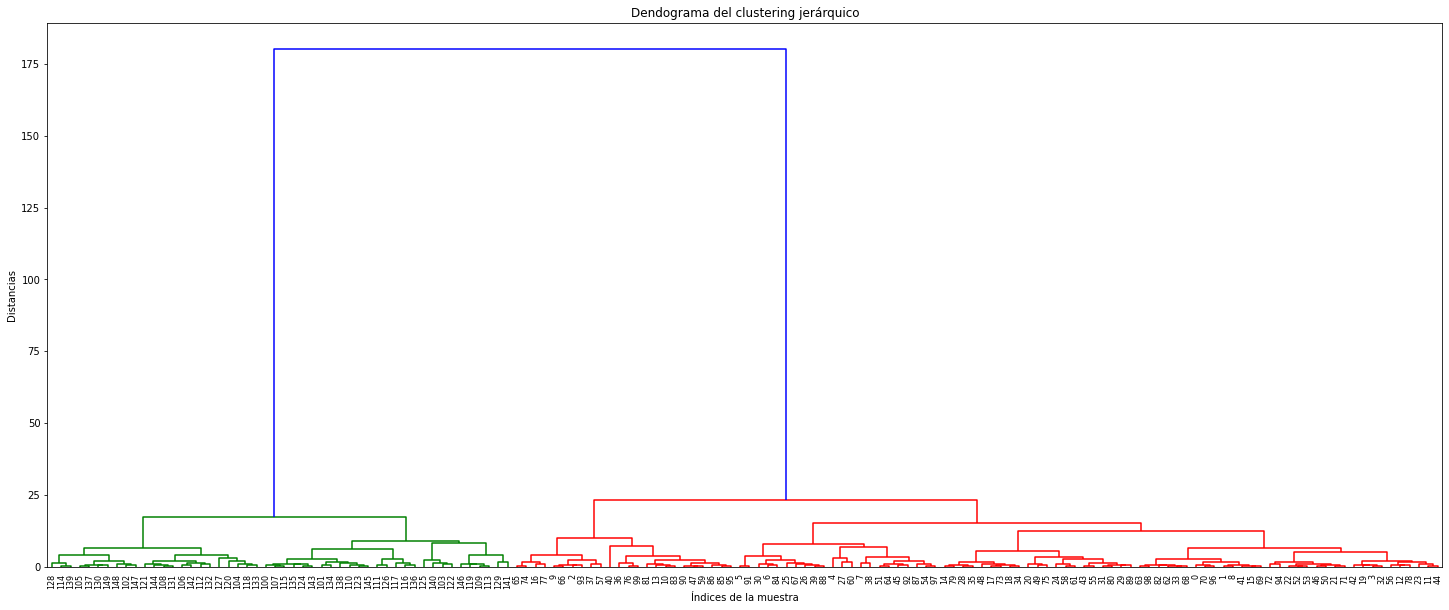

In [ ]:
# Representación gráfica de un dendograma
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel('Distancias')
# función dendrogram(matriz_de_enlaces,kwargs)
dendrogram(Z,leaf_rotation=90,leaf_font_size=8.0)
plt.show()

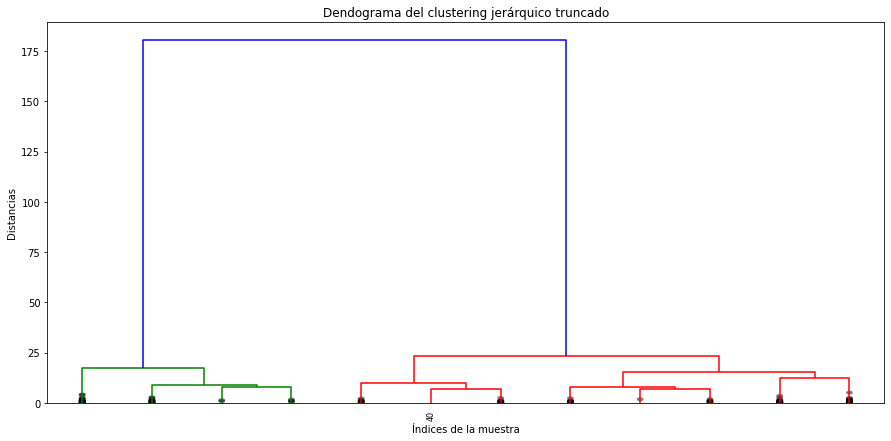

In [ ]:
# Truncamiento del dendograma
plt.figure(figsize=(15,7))
plt.title("Dendograma del clustering jerárquico truncado")
plt.xlabel("Índices de la muestra")
plt.ylabel('Distancias')
# función dendrogram(matriz_de_enlaces,kwargs)
# show_leaf_count: Cunatos elementos forman el cluster
# show_contracted: contraer los clusters en el gráfico
dendrogram(Z,leaf_rotation=90,leaf_font_size=8.0, color_threshold= 0.7*180,
           truncate_mode = "lastp", p = 12,show_leaf_counts = True,show_contracted = True)
plt.show()

In [ ]:
# Tuneando el dendograma
def dendrogram_tune(*args,**kwargs):
  max_d = kwargs.pop("max_d", None)
  if max_d and 'color_threshold' not in kwargs:
    kwargs['color_threshold'] = max_d
  annotate_above = kwargs.pop('annotate_above',0)

  ddata = dendrogram(*args,**kwargs)

  if not kwargs.get('no_plot', False):
    plt.title('Clustering jerárquico con Dendrograma truncado')
    plt.xlabel('Índice del Dataset ( o tamaño del cluster')
    plt.ylabel('Distancia')
    for index,distance,color in zip(ddata['icoord'],ddata['ddata'],ddata['color_list']):
      x = 0.5*sum[index[1:3]]
      y = distance[1]
      if y > annotate_above:
        plt.plot(x,y,'o',c=color)
        plt.annotate('%.3g'%y,(x,y),xytext=(0,-0.5),
                     textcpprds='offset points',va= "top",ha = 'center')
  
  if max_d:
    plt.axhline(y=max_d,c='k')
  return ddata

**Ejercicio**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/CURSO UDEMY/Repositorio de Curso UDEMY/wine/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
### Normalizando los datos
df_norm = (df - df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [ ]:
# Funcion_ AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters= 6, linkage= "ward").fit(df_norm)
resultados_jerarquico = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

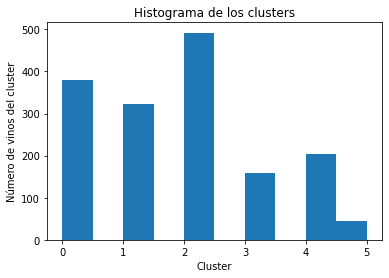

In [ ]:
# Histograma de los clusters
plt.hist(resultados_jerarquico)
plt.title('Histograma de los clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de vinos del cluster')

In [ ]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [ ]:
Enlace = linkage(df_norm,"ward")

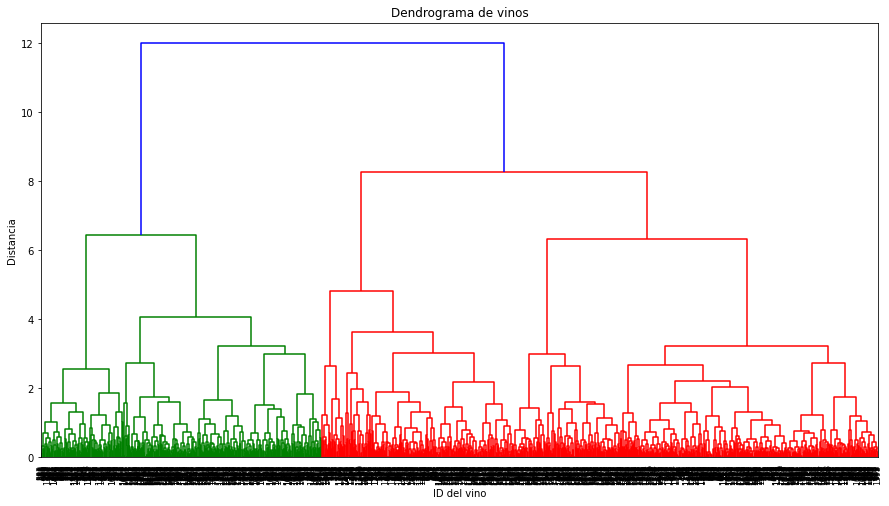

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Dendrograma de vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Enlace,leaf_rotation = 90., leaf_font_size=8.,show_contracted= True)
plt.show()

# **Clustering K-means**

Es diferente debido a que no hay una jerarquía. Se divide en K grupos y se define a priori. Se eligen k baricentros de forma aleatoria. Se basa en alguna regla dependiendo de los datos que se está analizando. 

In [ ]:
data = np.random.random(90).reshape(30,3)
data

array([[0.47691061, 0.03677278, 0.09829644],
       [0.56970804, 0.4600512 , 0.91048479],
       [0.45460273, 0.44183579, 0.56879745],
       [0.79834105, 0.75780239, 0.89108672],
       [0.38219578, 0.49644754, 0.81442745],
       [0.59394031, 0.77276016, 0.05092669],
       [0.49649798, 0.35117338, 0.60194617],
       [0.80920316, 0.4764693 , 0.47035073],
       [0.51671892, 0.81801103, 0.10505748],
       [0.53292129, 0.01712859, 0.77658593],
       [0.98198138, 0.94845232, 0.02121703],
       [0.09971147, 0.46929762, 0.07954669],
       [0.58986518, 0.42842263, 0.75288721],
       [0.75785077, 0.95474613, 0.44274275],
       [0.73548399, 0.08917095, 0.2232179 ],
       [0.33035321, 0.1077077 , 0.33116353],
       [0.61692948, 0.86933074, 0.42244712],
       [0.8096445 , 0.42510855, 0.77596391],
       [0.3679287 , 0.89032209, 0.78274432],
       [0.36004707, 0.21264865, 0.49075911],
       [0.32499332, 0.65036789, 0.70243155],
       [0.30621151, 0.00175745, 0.09880957],
       [0.

In [ ]:
# Defimos el centroide: de manera aleatoria
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
clust_centers = np.vstack([data[c1],data[c2]])
clust_centers

array([[0.53292129, 0.01712859, 0.77658593],
       [0.33428264, 0.79020276, 0.54835904]])

In [ ]:
# Nos da la distancias de los datos hacia los baricentros
vq(data,clust_centers)

(array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 0], dtype=int32),
 array([0.68088157, 0.4641795 , 0.36912626, 0.57780815, 0.39922449,
        0.56139585, 0.37869728, 0.57451152, 0.48017973, 0.        ,
        0.84996193, 0.61464523, 0.41589304, 0.46651826, 0.59366482,
        0.49763391, 0.3193811 , 0.49297441, 0.25708441, 0.38705368,
        0.20827487, 0.71485271, 0.46503242, 0.40726637, 0.33157452,
        0.4180941 , 0.        , 0.47472137, 0.33465412, 0.50467111]))

In [ ]:
kmeans(data,clust_centers)
# El segundo output es la suma de cuadrados de todas las distancias.

(array([[0.48345228, 0.26868571, 0.5428645 ],
        [0.46493619, 0.78564791, 0.44064479]]), 0.37378426881532945)

In [ ]:
# El primero fue con baricentros y también funciona con la cantidad de clusters.
kmeans(data,2)

(array([[0.34666641, 0.1595048 , 0.39410896],
        [0.53980976, 0.65930159, 0.55079946]]), 0.37142497982785655)

**Clustering de vinos**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/CURSO UDEMY/Repositorio de Curso UDEMY/wine/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

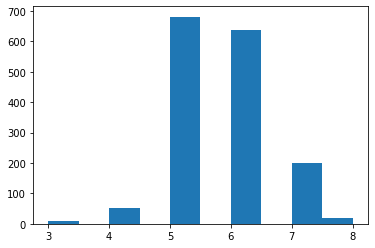

In [ ]:
plt.hist(df['quality'])

In [ ]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [ ]:
### Normalizando los datos
df_norm = (df - df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [ ]:
# Crea el modleo de K-means
model = KMeans(n_clusters= 6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([5, 5, 5, ..., 2, 5, 3], dtype=int32)

In [ ]:
resultados = pd.Series(model.labels_)
resultados

0       5
1       5
2       5
3       4
4       5
       ..
1594    2
1595    2
1596    2
1597    5
1598    3
Length: 1599, dtype: int32

In [ ]:
# Incorporando en el dataset original los dos tipos de clustering
df_norm['clust_h'] = resultados_jerarquico
df_norm['clust_k'] = resultados

In [ ]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,5


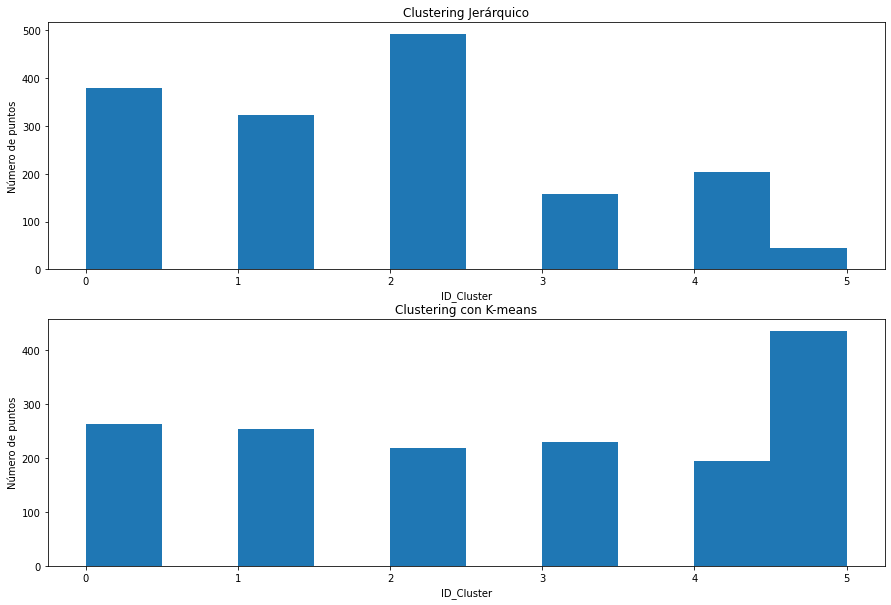

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.title("Clustering Jerárquico")
plt.xlabel("ID_Cluster")
plt.ylabel("Número de puntos")
plt.hist(resultados_jerarquico)
plt.subplot(2,1,2)
plt.title("Clustering con K-means")
plt.xlabel("ID_Cluster")
plt.ylabel("Número de puntos")
plt.hist(resultados)
plt.show()

In [ ]:
# Obteniendo centroides del modelo de K-Means
model.cluster_centers_
# Tener en cuentra que tiene doce dimensiones

array([[0.31074397, 0.2846242 , 0.29190114, 0.16159696, 0.12591963,
        0.41078027, 0.31396364, 0.53426799, 0.43519655, 0.17888937,
        0.21682753, 0.45247148],
       [0.3606455 , 0.25154445, 0.35164706, 0.09527263, 0.17119382,
        0.15564761, 0.13571676, 0.54508076, 0.40160568, 0.23179523,
        0.21683258, 0.48392157],
       [0.17476866, 0.32030712, 0.09401826, 0.09351348, 0.09557787,
        0.25114155, 0.1248205 , 0.32177365, 0.57883004, 0.18737867,
        0.4938766 , 0.61461187],
       [0.36505383, 0.15488051, 0.43277056, 0.10795825, 0.10755299,
        0.16468508, 0.08402552, 0.40227956, 0.41541398, 0.23783602,
        0.50629371, 0.71601732],
       [0.62229724, 0.20265499, 0.54747423, 0.13829261, 0.13562983,
        0.13990126, 0.09200029, 0.67021663, 0.31037422, 0.23452065,
        0.31202749, 0.56597938],
       [0.25017719, 0.37164195, 0.09171625, 0.09254412, 0.12035314,
        0.15352757, 0.10726848, 0.48266112, 0.50173877, 0.15233149,
        0.22812298,

In [ ]:
# Factor de eficiencia del modelo: Suma de cuadrado de las distancias hacia el baricentro de los clusters
model.inertia_

188.60554101711233

Interpretación del análisis de vinos

In [ ]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.310744,0.284624,0.291901,0.161597,0.125920,0.410780,0.313964,0.534268,0.435197,0.178889,0.216828,0.452471,1.057034
1,0.360645,0.251544,0.351647,0.095273,0.171194,0.155648,0.135717,0.545081,0.401606,0.231795,0.216833,0.483922,1.537255
2,0.174769,0.320307,0.094018,0.093513,0.095578,0.251142,0.124820,0.321774,0.578830,0.187379,0.493877,0.614612,3.433790
3,0.365054,0.154881,0.432771,0.107958,0.107553,0.164685,0.084026,0.402280,0.415414,0.237836,0.506294,0.716017,0.090909
4,0.622297,0.202655,0.547474,0.138293,0.135630,0.139901,0.092000,0.670217,0.310374,0.234521,0.312027,0.565979,2.386598
5,0.250177,0.371642,0.091716,0.092544,0.120353,0.153528,0.107268,0.482661,0.501739,0.152331,0.228123,0.436613,2.082380
